In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [7]:
application = pd.read_csv('../../all/application_train.csv')
#list(application.columns.values)

Eploring the target distribution

In [8]:
application['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

The credit amount of the loan distribution according to target

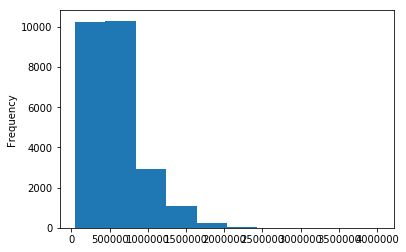

In [9]:
app1 = application.loc[application['TARGET'] == 1]
#app1['AMT_CREDIT'].value_counts()
app1['AMT_CREDIT'].astype(int).plot.hist()

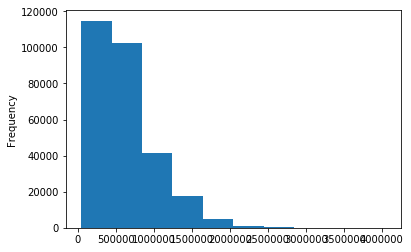

In [10]:
app0 = application.loc[application['TARGET'] == 0]
#app0['AMT_CREDIT'].value_counts()
app0['AMT_CREDIT'].astype(int).plot.hist()

Find the columns that affected the most on the lenders' final decisions(whether to approve or reject a loan)

In [13]:
correlations = application.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


From the scores listed above, we can see that days_birth, own_car_age, external source of information are important information. Before exploring more, we will see the distribution of the amount of credit among all loan applications:

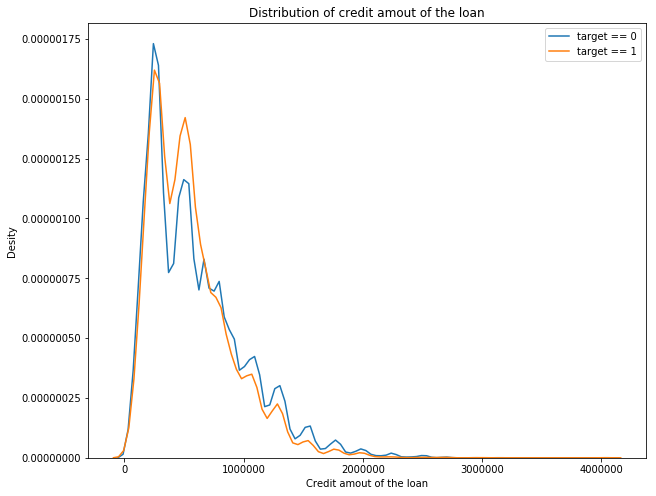

In [18]:
plt.figure(figsize = (10,8))
tmp = application.dropna(subset=['AMT_CREDIT'])
sns.kdeplot(tmp.loc[tmp['TARGET'] ==0, 'AMT_CREDIT'], label = 'target == 0')
sns.kdeplot(tmp.loc[tmp['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')
plt.xlabel('Credit amout of the loan'); plt.ylabel('Desity'); plt.title('Distribution of credit amout of the loan');

In [ ]:
We can that the percent of $40k-$70k loan get rejected tends to be higher.
Some other plots about distribution of important features values:
    1. The OWN_CAR_AGE distribution

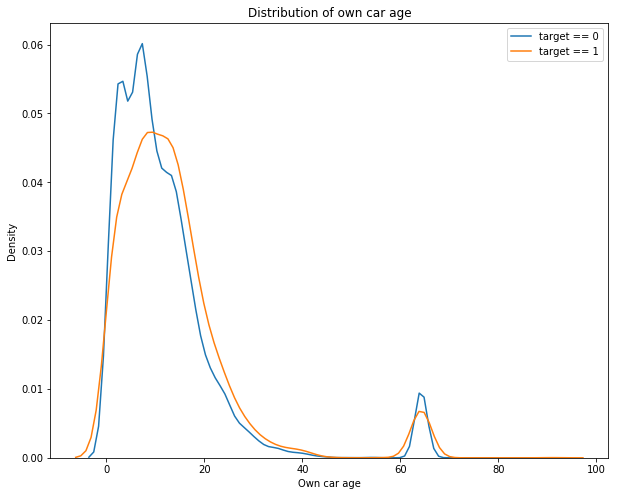

In [16]:
plt.figure(figsize = (10, 8))
tmp = application.dropna(subset=['OWN_CAR_AGE'])

# KDE plot of loans that were repaid on time
sns.kdeplot(tmp.loc[tmp['TARGET'] == 0, 'OWN_CAR_AGE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(tmp.loc[tmp['TARGET'] == 1, 'OWN_CAR_AGE'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Own car age'); plt.ylabel('Density'); plt.title('Distribution of own car age');

2. The external source 3 scores range for rejected applications encapsulate that of accepted applications

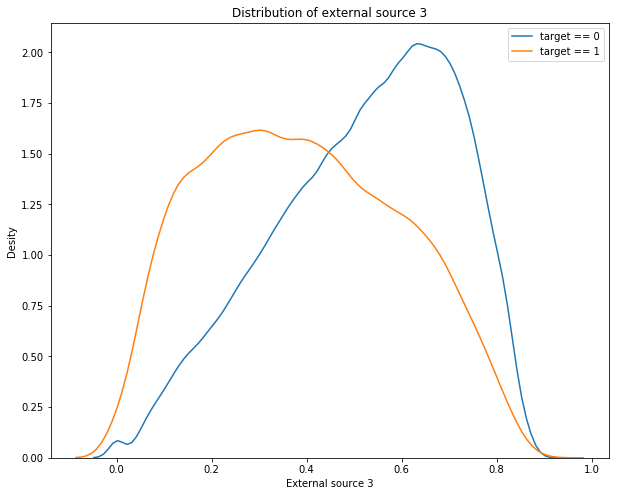

In [21]:
plt.figure(figsize = (10,8))
tmp = application.dropna(subset=['EXT_SOURCE_3'])
sns.kdeplot(tmp.loc[tmp['TARGET'] ==0, 'EXT_SOURCE_3'], label = 'target == 0')
sns.kdeplot(tmp.loc[tmp['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')
plt.xlabel('External source 3'); plt.ylabel('Desity'); plt.title('Distribution of external source 3');

3. The external source 2 scores tends to be smaller for rejected applications. But accepted and rejected applications still share the same range of scores for the external source 2

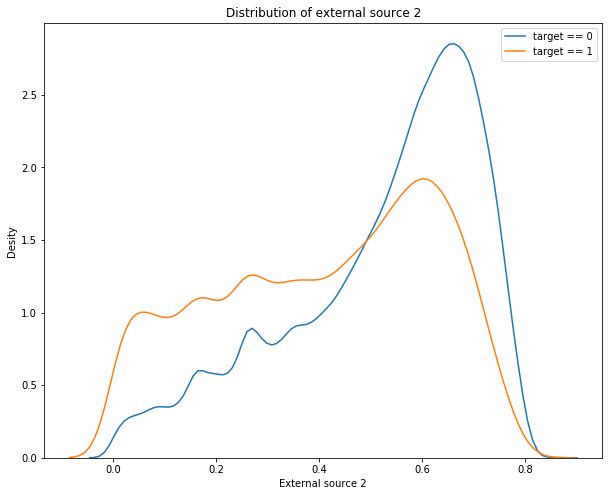

In [22]:
plt.figure(figsize = (10,8))
tmp = application.dropna(subset=['EXT_SOURCE_2'])
sns.kdeplot(tmp.loc[tmp['TARGET'] ==0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(tmp.loc[tmp['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')
plt.xlabel('External source 2'); plt.ylabel('Desity'); plt.title('Distribution of external source 2');

In [ ]:
4. the external source 1 score tends to be lower for rejected application

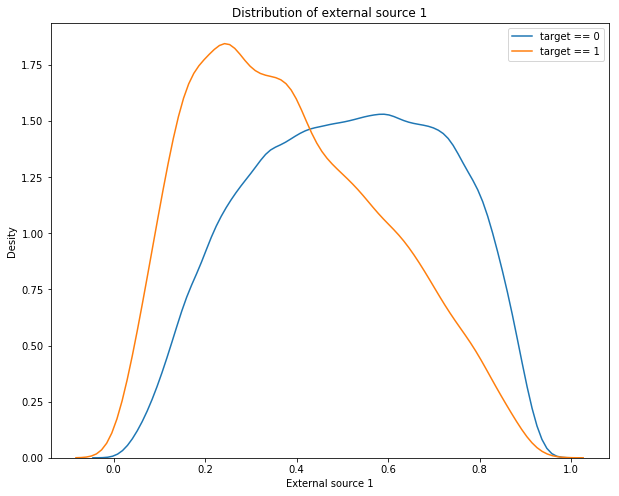

In [23]:
plt.figure(figsize = (10,8))
tmp = application.dropna(subset=['EXT_SOURCE_1'])
sns.kdeplot(tmp.loc[tmp['TARGET'] ==0, 'EXT_SOURCE_1'], label = 'target == 0')
sns.kdeplot(tmp.loc[tmp['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1')
plt.xlabel('External source 1'); plt.ylabel('Desity'); plt.title('Distribution of external source 1');